#Social_Network_Ads

Binary Class classification model. Data includes gender, age and income of users and model requires to predict wheather the user will purchase the product or not.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import *

In [4]:
df = pd.read_csv('/content/Social_Network_Ads.csv')
df.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df = df.iloc[:,1:]
df.head()


,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [7]:
##Encoding Gender

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Gender']= label_encoder.fit_transform(df['Gender'])
df.head(5)

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [ ]:
#Encoding Details
#Gender
#Male - 1
#Female - 0
#Purchased
#Yes - 1
#No - 0

In [8]:
x = df.iloc[:,0:3]
y = df.iloc[:,-1]



In [11]:
#Normalization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_sc = sc.fit_transform(x)

In [12]:
#test train split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_sc, y, train_size=0.2, random_state=101)

Deep Neural Network - Classification Problem

In [29]:
#importing early stopping
from keras.callbacks import EarlyStopping

In [37]:
dnn = Sequential()
dnn.add(Dense(32, activation = 'relu', input_dim=3))
dnn.add(Dense(1, activation ='sigmoid'))
dnn.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 32)                128       
                                                                 
 dense_16 (Dense)            (None, 1)                 33        
                                                                 
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________


In [38]:
callback = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=40, verbose=1, mode='auto')
dnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = dnn.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5000, callbacks=callback)

Epoch 1/5000
3/3 [==============================] - 1s 77ms/step - loss: 0.6768 - accuracy: 0.5625 - val_loss: 0.6653 - val_accuracy: 0.6031
Epoch 2/5000
3/3 [==============================] - 0s 22ms/step - loss: 0.6667 - accuracy: 0.6000 - val_loss: 0.6549 - val_accuracy: 0.6625
Epoch 3/5000
3/3 [==============================] - 0s 23ms/step - loss: 0.6573 - accuracy: 0.6125 - val_loss: 0.6452 - val_accuracy: 0.6781
Epoch 4/5000
3/3 [==============================] - 0s 24ms/step - loss: 0.6482 - accuracy: 0.6625 - val_loss: 0.6357 - val_accuracy: 0.7031
Epoch 5/5000
3/3 [==============================] - 0s 21ms/step - loss: 0.6392 - accuracy: 0.6625 - val_loss: 0.6267 - val_accuracy: 0.7188
Epoch 6/5000
3/3 [==============================] - 0s 23ms/step - loss: 0.6312 - accuracy: 0.7000 - val_loss: 0.6179 - val_accuracy: 0.7406
Epoch 7/5000
3/3 [==============================] - 0s 24ms/step - loss: 0.6228 - accuracy: 0.7125 - val_loss: 0.6095 - val_accuracy: 0.7500
Epoch 8/5000


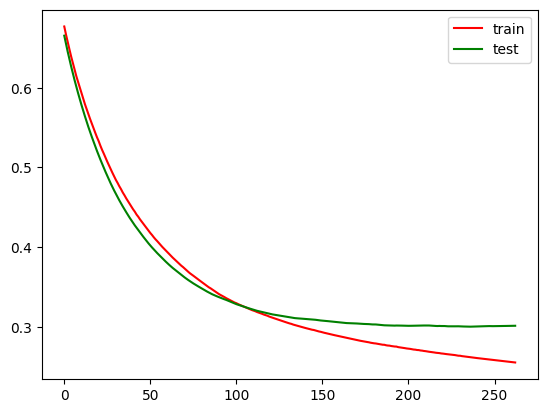

In [39]:
plt.plot(history.history['loss'], label='train', color='red')
plt.plot(history.history['val_loss'], label='test', color='green')
plt.legend()
plt.show()


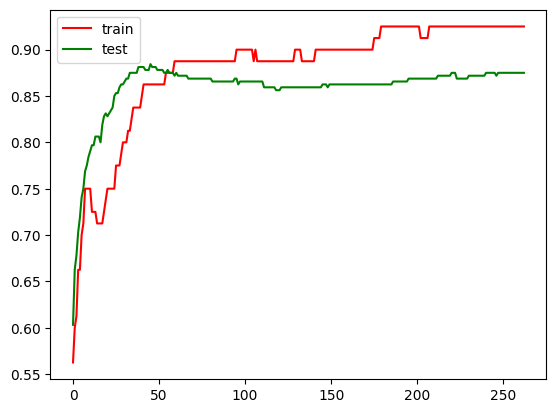

In [40]:
plt.plot(history.history['accuracy'], label='train', color='red')
plt.plot(history.history['val_accuracy'], label='test', color='green')
plt.legend()
plt.show()
